In [3]:
import pandas as pd
import matplotlib as plt
import re

cores = [2, 4, 6, 8]

%matplotlib inline

In [10]:
def read_stats(stat):
    values = []
    
    for size in cores:
        with open(f"/home/nivetha/5SIA0-ECA-Assignments/eeg/9/{size}/stats.txt") as f:
            line = f.readline()
            while line:
                line = re.sub(r"\s+#.*$", "", line)
                if re.match(stat, line):
                    value = float(re.split(r"\s+", line)[1])
                    values.append(value)
                line = f.readline()
                
    return pd.Series(list(values), name=stat)

   num_of_cores  simulation_time
0             2         0.295334
1             4         0.157607
2             6         0.110882
3             8         0.087537


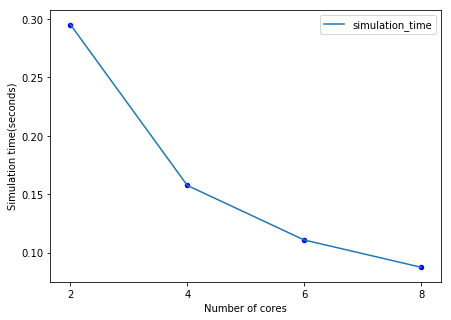

In [11]:
# Cache size vs simulation seconds
cores = pd.Series(cores, name='num_of_cores')
simulation_time = read_stats("sim_seconds").rename("simulation_time")

df = pd.concat([cores, simulation_time], axis=1)

ax = df.plot(kind='line', x='num_of_cores', figsize=(7, 5))
df.plot(kind='scatter', x='num_of_cores', y='simulation_time', c='blue', ax=ax)
print(df)
ax.set_xlabel('Number of cores')
ax.set_ylabel('Simulation time(seconds)')
ax.set_xticks(df.num_of_cores)

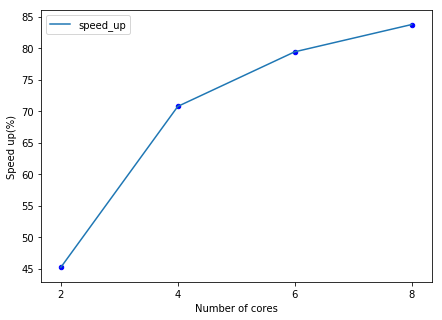

In [14]:
# Cache size vs simulation seconds
cores = pd.Series(cores, name='num_of_cores')
simulation_time = read_stats("sim_seconds").rename("simulation_time")
native_simulation_time = pd.Series([0.539009, 0.539009, 0.539009, 0.539009], name ='native')
df = pd.concat([cores, simulation_time,native_simulation_time], axis=1)
df['speed_up'] = ((df['native'] - df['simulation_time'])/df['native'])*100
df=df[['num_of_cores', 'speed_up']]
ax = df.plot(kind='line', x='num_of_cores', figsize=(7, 5))
df.plot(kind='scatter', x='num_of_cores', y='speed_up', c='blue', ax=ax)

ax.set_xlabel('Number of cores')
ax.set_ylabel('Speed up(%)')
ax.set_xticks(df.num_of_cores)

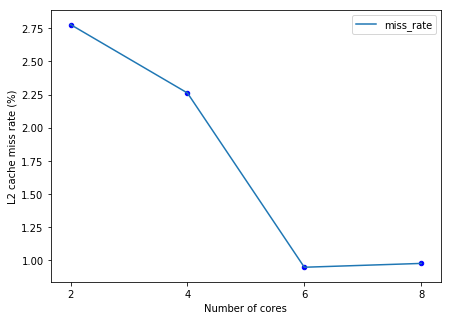

In [18]:
# Cache size vs cache miss rate
cores = pd.Series(cores, name='num_of_cores')
overall_miss_rate = read_stats("system.l2.overall_miss_rate::total").rename("miss_rate")


df = pd.concat([cores, overall_miss_rate], axis=1)

df.miss_rate = df.miss_rate.apply(lambda x: x * 100)


ax = df.plot(kind='line', x='num_of_cores', figsize=(7, 5))

df.plot(kind='scatter', x='num_of_cores', y='miss_rate', c='blue', ax=ax)

ax.set_xlabel('Number of cores')
ax.set_ylabel('L2 cache miss rate (%)')
ax.set_xticks(df.num_of_cores)